In [1]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from scipy.spatial.distance import euclidean

# Corpus
corpus = [
    "a very good movie",
    "this movie is excellent",
    "very good and excellent",
    "the movie is bad",
    "poor and boring plot",
    "bad and boring movie"
]

# Sentence to compare
sentence_to_compare = "movie is very bad"

# Step 1: Vectorize the corpus using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus + [sentence_to_compare]).toarray()

# Extract vector for "movie is very bad" (last entry in the matrix)
sentence_vector = X[-1]

# Step 2: Calculate Euclidean distances between the sentence and each corpus sentence
distances = []
for i, vec in enumerate(X[:-1]):  # Exclude the last vector (which is the sentence_to_compare)
    dist = euclidean(sentence_vector, vec)
    distances.append((corpus[i], dist))

# Step 3: Sort the sentences by distance (closest first)
distances.sort(key=lambda x: x[1])

# Display the top 3 closest sentences
distances[:5]


[('the movie is bad', 1.4142135623730951),
 ('a very good movie', 1.7320508075688772),
 ('this movie is excellent', 2.0),
 ('bad and boring movie', 2.0),
 ('very good and excellent', 2.449489742783178)]

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

# Tạo dữ liệu corpus
corpus = [
    "a very good movie",
    "this movie is excellent",
    "very good and excellent",
    "the movie is bad",
    "poor and boring plot",
    "bad and boring movie"
]

# Sử dụng CountVectorizer không loại bỏ từ dừng
vectorizer_full = CountVectorizer()
X_full = vectorizer_full.fit_transform(corpus).toarray()

# Hiển thị từ vựng đầy đủ
vocab_full = vectorizer_full.get_feature_names_out()
print("Vocab:", vocab_full)

# Tạo các tâm cụm đã điều chỉnh theo bộ từ vựng mới
# Vocab: ['and', 'bad', 'boring', 'excellent', 'good', 'is', 'movie', 'plot', 'poor', 'the', 'this', 'very']
C1_adjusted = np.array([1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1])  # very good and excellent
C2_adjusted = np.array([0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0])  # the movie is bad

# Lấy các sample 0, 1, 4, 5 từ dữ liệu
samples_indices = [0, 1, 4, 5]
samples = X_full[samples_indices]

# Hàm tính khoảng cách Euclidean
def euclidean_distance(vec1, vec2):
    return np.sqrt(np.sum((vec1 - vec2) ** 2))

# Tính khoảng cách từ C1_adjusted và C2_adjusted đến tất cả các sample
distances_C1_adjusted = [euclidean_distance(C1_adjusted, sample) for sample in X_full]
distances_C2_adjusted = [euclidean_distance(C2_adjusted, sample) for sample in X_full]

# In kết quả khoảng cách cho tất cả các sample
print("Khoảng cách từ C1 tới tất cả các sample:", distances_C1_adjusted)
print("Khoảng cách từ C2 tới tất cả các sample:", distances_C2_adjusted)

# In kết quả khoảng cách cho các sample 0, 1, 4, 5
samples_indices = [0, 1, 4, 5]
print("\nKhoảng cách từ C1 tới các sample 0, 1, 4, 5:", [distances_C1_adjusted[i] for i in samples_indices])
print("Khoảng cách từ C2 tới các sample 0, 1, 4, 5:", [distances_C2_adjusted[i] for i in samples_indices])



Vocab: ['and' 'bad' 'boring' 'excellent' 'good' 'is' 'movie' 'plot' 'poor' 'the'
 'this' 'very']
Khoảng cách từ C1 tới tất cả các sample: [1.7320508075688772, 2.449489742783178, 0.0, 2.8284271247461903, 2.449489742783178, 2.449489742783178]
Khoảng cách từ C2 tới tất cả các sample: [2.23606797749979, 2.0, 2.8284271247461903, 0.0, 2.8284271247461903, 2.0]

Khoảng cách từ C1 tới các sample 0, 1, 4, 5: [1.7320508075688772, 2.449489742783178, 2.449489742783178, 2.449489742783178]
Khoảng cách từ C2 tới các sample 0, 1, 4, 5: [2.23606797749979, 2.0, 2.8284271247461903, 2.0]


In [3]:
# Xác định cụm cho từng sample
cluster_assignments = []
for d1, d2 in zip(distances_C1_adjusted, distances_C2_adjusted):
    if d1 < d2:
        cluster_assignments.append('C1')
    else:
        cluster_assignments.append('C2')

# Tạo vector biểu diễn phân cụm của bộ data X
cluster_vector = cluster_assignments

# In kết quả
print("Vector biểu diễn phân cụm của bộ data X:", cluster_vector)


Vector biểu diễn phân cụm của bộ data X: ['C1', 'C2', 'C1', 'C2', 'C1', 'C2']


In [4]:
# Cập nhật tọa độ của tâm cụm C1 và C2 dựa trên các phân cụm hiện tại
C1_adjusted = np.round(np.mean(X_full[np.array(cluster_assignments) == 'C1'], axis=0), 1)
C2_adjusted = np.round(np.mean(X_full[np.array(cluster_assignments) == 'C2'], axis=0), 1)

print("C1 mới:", C1_adjusted)
print("C2 mới:", C2_adjusted)


C1 mới: [0.7 0.  0.3 0.3 0.7 0.  0.3 0.3 0.3 0.  0.  0.7]
C2 mới: [0.3 0.7 0.3 0.3 0.  0.7 1.  0.  0.  0.3 0.3 0. ]


In [5]:
# Xác định cụm cho từng sample
cluster_assignments = []
for d1, d2 in zip(distances_C1_adjusted, distances_C2_adjusted):
    if d1 < d2:
        cluster_assignments.append('C1')
    else:
        cluster_assignments.append('C2')

# Tạo vector biểu diễn phân cụm của bộ data X
cluster_vector = cluster_assignments

# In kết quả
print("Vector biểu diễn phân cụm của bộ data X:", cluster_vector)


Vector biểu diễn phân cụm của bộ data X: ['C1', 'C2', 'C1', 'C2', 'C1', 'C2']


In [6]:
import numpy as np

# Define the labels from the training data
labels = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']

# Count the occurrences of each class
label_counts = {}
for label in labels:
    label_counts[label] = label_counts.get(label, 0) + 1

# Calculate the probabilities
total = len(labels)
entropy = 0
for count in label_counts.values():
    probability = count / total
    entropy -= probability * np.log2(probability)

# Print the entropy rounded to 4 decimal places
print(round(entropy, 4))


0.971


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Tạo dữ liệu huấn luyện
train_data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes']
}

# Tạo dữ liệu kiểm tra
test_data = {
    'Outlook': ['Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['Normal', 'High', 'Normal', 'High'],
    'Wind': ['Strong', 'Strong', 'Weak', 'Strong'],
    'PlayTennis': ['Yes', 'Yes', 'Yes', 'No']
}

# Chuyển đổi thành DataFrame
X_train = pd.DataFrame(train_data)
X_test = pd.DataFrame(test_data)

# Tách nhãn
y_train = X_train.pop('PlayTennis')
y_test = X_test.pop('PlayTennis')

# Mã hóa các biến categorical
le = LabelEncoder()
for column in X_train.columns:
    X_train[column] = le.fit_transform(X_train[column])
    X_test[column] = le.transform(X_test[column])

# Chuyển đổi DataFrame thành numpy array
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print("Dữ liệu huấn luyện:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nDữ liệu kiểm tra:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


Dữ liệu huấn luyện:
X_train shape: (10, 4)
y_train shape: (10,)

Dữ liệu kiểm tra:
X_test shape: (4, 4)
y_test shape: (4,)


In [9]:
import numpy as np
from scipy.stats import entropy

def calculate_entropy(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return entropy(probabilities, base=2)

def calculate_information_gain(X, y, feature_index):
    total_entropy = calculate_entropy(y)
    
    feature_values, feature_counts = np.unique(X[:, feature_index], return_counts=True)
    weighted_entropy = 0
    
    for value, count in zip(feature_values, feature_counts):
        subset_indices = X[:, feature_index] == value
        subset_y = y[subset_indices]
        subset_entropy = calculate_entropy(subset_y)
        weighted_entropy += (count / len(y)) * subset_entropy
    
    information_gain = total_entropy - weighted_entropy
    return information_gain

# Tính Information Gain cho tất cả các thuộc tính
information_gains = []
feature_names = list(train_data.keys())[:-1]  # Loại bỏ cột 'PlayTennis'

for i in range(X_train.shape[1]):
    ig = calculate_information_gain(X_train, y_train, i)
    information_gains.append((feature_names[i], ig))

# Sắp xếp các thuộc tính theo Information Gain giảm dần
sorted_information_gains = sorted(information_gains, key=lambda x: x[1], reverse=True)

print("Information Gain của tất cả các thuộc tính:")
for feature, ig in sorted_information_gains:
    print(f"{feature}: {ig:.4f}")

# Xác định thuộc tính có Information Gain cao nhất
best_feature, best_ig = sorted_information_gains[0]

print(f"\nThuộc tính được chọn để chia nhánh đầu tiên: {best_feature} (Information Gain: {best_ig:.4f})")


Information Gain của tất cả các thuộc tính:
Outlook: 0.3219
Humidity: 0.1245
Temperature: 0.0955
Wind: 0.0913

Thuộc tính được chọn để chia nhánh đầu tiên: Outlook (Information Gain: 0.3219)


In [10]:
# Hàm để xây dựng cây quyết định
def build_decision_tree(X, y, feature_names, depth=0):
    # Nếu tất cả các mẫu thuộc cùng một lớp, trả về lá
    if len(np.unique(y)) == 1:
        return {"class": y[0], "is_leaf": True}
    
    # Nếu không còn thuộc tính để chia hoặc chỉ còn một mẫu, trả về lá với lớp phổ biến nhất
    if len(feature_names) == 0 or len(y) == 1:
        return {"class": np.bincount(y).argmax(), "is_leaf": True}
    
    # Tính Information Gain cho tất cả các thuộc tính
    information_gains = []
    for i in range(X.shape[1]):
        ig = calculate_information_gain(X, y, i)
        information_gains.append((feature_names[i], ig, i))
    
    # Chọn thuộc tính có Information Gain cao nhất
    best_feature, best_ig, best_index = max(information_gains, key=lambda x: x[1])
    
    # Tạo nút quyết định
    tree = {"feature": best_feature, "is_leaf": False, "branches": {}}
    
    # Chia nhánh dựa trên giá trị của thuộc tính tốt nhất
    feature_values = np.unique(X[:, best_index])
    for value in feature_values:
        subset_indices = X[:, best_index] == value
        subset_X = X[subset_indices]
        subset_y = y[subset_indices]
        new_feature_names = [f for f in feature_names if f != best_feature]
        
        # Đệ quy để xây dựng cây con
        subtree = build_decision_tree(np.delete(subset_X, best_index, axis=1), subset_y, new_feature_names, depth + 1)
        tree["branches"][value] = subtree
    
    return tree

# Xây dựng cây quyết định
decision_tree = build_decision_tree(X_train, y_train, feature_names)

# Hàm đếm số lá trong cây quyết định
def count_leaves(tree):
    if tree["is_leaf"]:
        return 1
    return sum(count_leaves(subtree) for subtree in tree["branches"].values())

# Đếm số lá trong cây quyết định hoàn chỉnh
num_leaves = count_leaves(decision_tree)

print(f"Cây quyết định hoàn chỉnh có {num_leaves} lá.")


Cây quyết định hoàn chỉnh có 6 lá.


In [11]:
# Hàm dự đoán cho một mẫu dữ liệu
def predict(tree, sample):
    if tree["is_leaf"]:
        return tree["class"]
    
    feature = tree["feature"]
    value = sample[feature_names.index(feature)]
    
    if value not in tree["branches"]:
        # Nếu giá trị không có trong cây, trả về lớp phổ biến nhất
        return max(set(y_train), key=list(y_train).count)
    
    return predict(tree["branches"][value], sample)

# Lấy dòng cuối cùng của tập kiểm tra
last_test_sample = X_test[-1]

# Dự đoán kết quả cho dòng cuối cùng
prediction = predict(decision_tree, last_test_sample)

print(f"Dự đoán cho dòng cuối cùng trong tập kiểm tra: {prediction}")

# In ra dòng dữ liệu cuối cùng để đối chiếu
print("Dòng dữ liệu cuối cùng:")
for feature, value in zip(feature_names, last_test_sample):
    print(f"{feature}: {value}")


Dự đoán cho dòng cuối cùng trong tập kiểm tra: No
Dòng dữ liệu cuối cùng:
Outlook: 1
Temperature: 2
Humidity: 0
Wind: 0


In [12]:
# Tạo mẫu dữ liệu mới
new_sample = ["Overcast", "Weak"]

# Dự đoán kết quả cho mẫu dữ liệu mới
prediction = predict(decision_tree, new_sample)

print("Dự đoán cho mẫu dữ liệu mới:")
print(f"Outlook = Overcast, Wind = Weak")
print(f"Kết quả dự đoán: {prediction}")


Dự đoán cho mẫu dữ liệu mới:
Outlook = Overcast, Wind = Weak
Kết quả dự đoán: Yes


In [13]:
# Hàm in cấu trúc cây quyết định
def print_tree(node, indent=""):
    if node["is_leaf"]:
        print(f"{indent}Leaf: {node['class']}")
    else:
        print(f"{indent}{node['feature']}:")
        for value, child in node['branches'].items():
            print(f"{indent}  {value} ->")
            print_tree(child, indent + "    ")

# In cấu trúc cây
print("Cấu trúc cây quyết định:")
print_tree(decision_tree)

# Cập nhật hàm predict với logging
def predict(tree, sample, path=[]):
    if tree["is_leaf"]:
        path.append(f"Leaf: {tree['class']}")
        return tree["class"], path
    
    feature = tree["feature"]
    value = sample[feature_names.index(feature)] if feature in feature_names else None
    
    path.append(f"{feature} = {value}")
    
    if value not in tree["branches"]:
        # Nếu giá trị không có trong cây, trả về lớp phổ biến nhất
        majority_class = max(set(y_train), key=list(y_train).count)
        path.append(f"Value not found, returning majority class: {majority_class}")
        return majority_class, path
    
    return predict(tree["branches"][value], sample, path)

# Dự đoán với mẫu dữ liệu mới và in ra đường đi quyết định
new_sample = ["Overcast", "Weak"]
prediction, decision_path = predict(decision_tree, new_sample)

print("\nDự đoán cho mẫu dữ liệu mới:")
print(f"Outlook = Overcast, Wind = Weak")
print(f"Kết quả dự đoán: {prediction}")
print("Đường đi quyết định:")
for step in decision_path:
    print(f"- {step}")

Cấu trúc cây quyết định:
Outlook:
  0 ->
    Leaf: Yes
  1 ->
    Wind:
      0 ->
        Leaf: No
      1 ->
        Leaf: Yes
  2 ->
    Temperature:
      0 ->
        Leaf: Yes
      1 ->
        Leaf: No
      2 ->
        Leaf: No

Dự đoán cho mẫu dữ liệu mới:
Outlook = Overcast, Wind = Weak
Kết quả dự đoán: Yes
Đường đi quyết định:
- Outlook = Overcast
- Value not found, returning majority class: Yes


In [14]:
# Dự đoán với mẫu dữ liệu mới: Temperature = Hot, Outlook = Rainy
new_sample = ["Rainy", "Hot"]
prediction, decision_path = predict(decision_tree, new_sample)

print("\nDự đoán cho mẫu dữ liệu mới:")
print(f"Outlook = Rainy, Temperature = Hot")
print(f"Kết quả dự đoán: {prediction}")
print("Đường đi quyết định:")
for step in decision_path:
    print(f"- {step}")



Dự đoán cho mẫu dữ liệu mới:
Outlook = Rainy, Temperature = Hot
Kết quả dự đoán: Yes
Đường đi quyết định:
- Outlook = Overcast
- Value not found, returning majority class: Yes
- Outlook = Rainy
- Value not found, returning majority class: Yes


In [15]:
# Tính độ chính xác của mô hình trên tập kiểm tra
correct_predictions = 0
total_predictions = len(X_test)

for i in range(total_predictions):
    sample = X_test[i]
    true_label = y_test[i]
    predicted_label, _ = predict(decision_tree, sample)
    if predicted_label == true_label:
        correct_predictions += 1

accuracy = correct_predictions / total_predictions

print(f"\nĐộ chính xác của mô hình cây quyết định trên tập kiểm tra: {accuracy:.2f}")



Độ chính xác của mô hình cây quyết định trên tập kiểm tra: 0.75


In [18]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Đọc dữ liệu
df = pd.read_csv('employee_data.csv')
print(df.head())

# Label Encoding
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Position'] = le.fit_transform(df['Position'])

# Tách dữ liệu thành bộ feature (X) và label (y)
X = df[['Gender', 'Experience (Years)', 'Position']]
y = df['Salary']

# Tách tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình Random Forest
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = rf_model.predict(X_test)

# Tính toán MSE và R^2
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.1f}")
print(f"R^2: {r2:.4f}")

# Câu trả lời: D. MSE: 827087272.8, R^2: 0.5572



   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397
MSE: 827087272.8
R^2: 0.5572


In [19]:
# Thử nghiệm số lượng cây của mô hình Random Forest
n_estimators_list = [10, 20, 50, 100]
mse_results = []

for n_estimators in n_estimators_list:
    # Huấn luyện mô hình Random Forest với số lượng cây khác nhau
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = rf_model.predict(X_test)
    
    # Tính toán MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    
    print(f"n_estimators: {n_estimators}, MSE: {mse:.1f}")

# Tìm số lượng cây cho MSE nhỏ nhất
best_n_estimators = n_estimators_list[np.argmin(mse_results)]
best_mse = min(mse_results)

print(f"\nSố lượng cây cho MSE nhỏ nhất: {best_n_estimators}")
print(f"MSE nhỏ nhất: {best_mse:.1f}")


n_estimators: 10, MSE: 816412296.1
n_estimators: 20, MSE: 808325351.4
n_estimators: 50, MSE: 827087272.8
n_estimators: 100, MSE: 833009696.9

Số lượng cây cho MSE nhỏ nhất: 20
MSE nhỏ nhất: 808325351.4


In [22]:
# Thử nghiệm độ sâu của cây trong mô hình Random Forest
max_depth_list = range(1, 11)  # Từ 1 đến 10
mse_results = []

for max_depth in max_depth_list:
    # Huấn luyện mô hình Random Forest với độ sâu cây khác nhau
    rf_model = RandomForestRegressor(n_estimators=50, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    
    # Dự đoán trên tập kiểm tra
    y_pred = rf_model.predict(X_test)
    
    # Tính toán MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_results.append(mse)
    
    print(f"max_depth: {max_depth}, MSE: {mse:.1f}")

# Tìm độ sâu cây cho MSE nhỏ nhất
best_max_depth = max_depth_list[np.argmin(mse_results)]
best_mse = min(mse_results)

print(f"\nĐộ sâu cây cho MSE nhỏ nhất: {best_max_depth}")
print(f"MSE nhỏ nhất: {best_mse:.1f}")


max_depth: 1, MSE: 1104427067.5
max_depth: 2, MSE: 797933393.3
max_depth: 3, MSE: 693542373.9
max_depth: 4, MSE: 661524516.7
max_depth: 5, MSE: 646269023.8
max_depth: 6, MSE: 677299521.4
max_depth: 7, MSE: 711419071.8
max_depth: 8, MSE: 762993834.6
max_depth: 9, MSE: 797015563.9
max_depth: 10, MSE: 820348978.5

Độ sâu cây cho MSE nhỏ nhất: 5
MSE nhỏ nhất: 646269023.8


In [27]:
import numpy as np

class Solution:
    def update_centroids(self, train_data, allocation):
        # Convert input data to numpy array for easier manipulation
        data = np.array(train_data)
        allocation = np.array(allocation)
        
        # Initialize centroids list
        centroids = []
        
        # Update centroid for Cluster 1 (C1)
        c1_points = data[allocation == 0]
        if len(c1_points) > 0:
            c1_centroid = np.mean(c1_points, axis=0)
            centroids.append(c1_centroid.tolist())
        
        # Update centroid for Cluster 2 (C2)
        c2_points = data[allocation == 1]
        if len(c2_points) > 0:
            c2_centroid = np.mean(c2_points, axis=0)
            centroids.append(c2_centroid.tolist())
        
        # Round the centroids to 2 decimal places
        centroids = [[round(val, 2) for val in centroid] for centroid in centroids]
        
        return centroids


In [ ]:
from sklearn.cluster import KMeans
import numpy as np

class Solution:
    def find_labels(self, train_data):
        # Convert train_data to numpy array for easier manipulation
        data = np.array(train_data)
        
        # Initialize centroids with the 4th and 7th data points (index 3 and 6)
        initial_centroids = np.array([train_data[3], train_data[6]])
        
        # Create KMeans model
        kmeans = KMeans(n_clusters=2, init=initial_centroids, n_init=1)
        
        # Fit the model and get labels
        labels = kmeans.fit_predict(data)
        
        # Convert labels to a regular Python list before returning
        return labels.tolist()


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Đọc dữ liệu
data = pd.read_csv('employee_data.csv')
print(data.head())

# 2. Label Encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Position'] = le.fit_transform(data['Position'])

# 3. Tách dữ liệu thành bộ feature (X) và label (y)
X = data[['Gender', 'Experience (Years)', 'Position']]
y = data['Salary']

# 4. Tách tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nShape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

# Câu hỏi: Điểm khác biệt chính giữa AdaBoost và Gradient Boosting
print("\nĐiểm khác biệt chính giữa AdaBoost và Gradient Boosting:")
print("A) AdaBoost tập trung vào việc sửa lỗi của các mẫu dữ liệu có lỗi cao nhất, còn Gradient Boosting tập trung vào giảm thiểu giá trị lỗi toàn bộ bằng cách sử dụng đạo hàm.")


   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397

Shape of training set: (320, 3)
Shape of testing set: (80, 3)

Điểm khác biệt chính giữa AdaBoost và Gradient Boosting:
A) AdaBoost tập trung vào việc sửa lỗi của các mẫu dữ liệu có lỗi cao nhất, còn Gradient Boosting tập trung vào giảm thiểu giá trị lỗi toàn bộ bằng cách sử dụng đạo hàm.


AdaBoost:


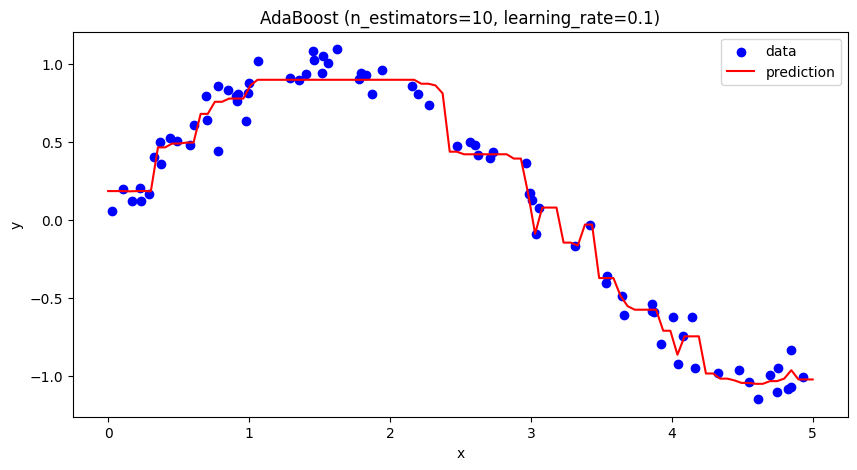

Ít mô hình con: (0.005444624538283652, 0.01247754960978557)


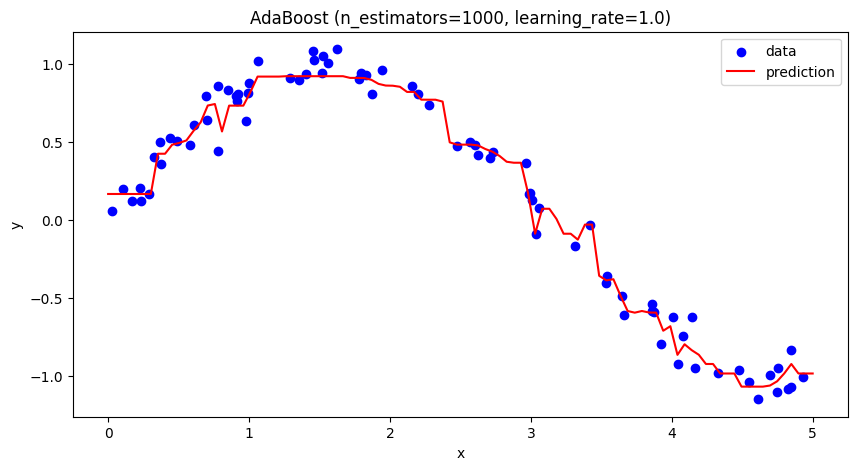

Nhiều mô hình con, learning rate cao: (0.003383055550651968, 0.010456860645634485)


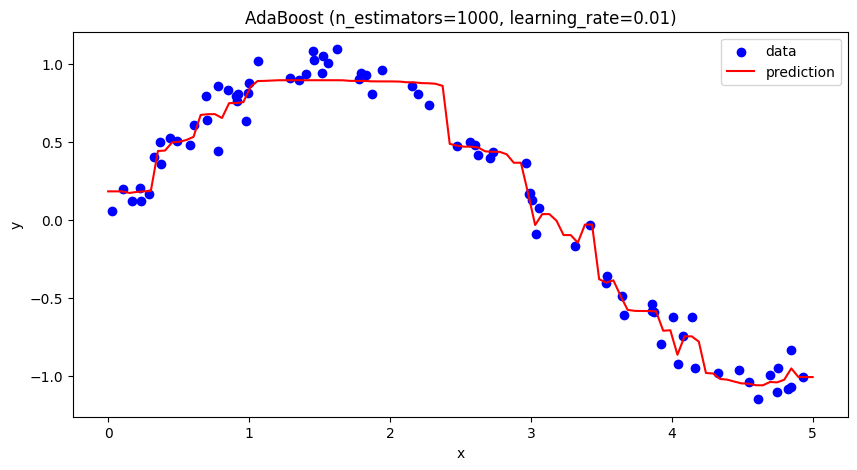

Nhiều mô hình con, learning rate thấp: (0.004604356572144119, 0.012450186975791692)

Gradient Boosting:


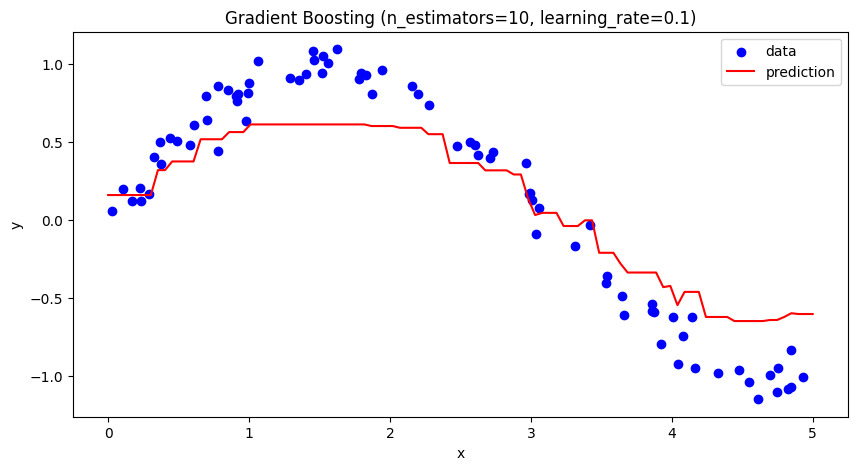

Ít mô hình con: (0.06712552570814109, 0.08835303658061708)


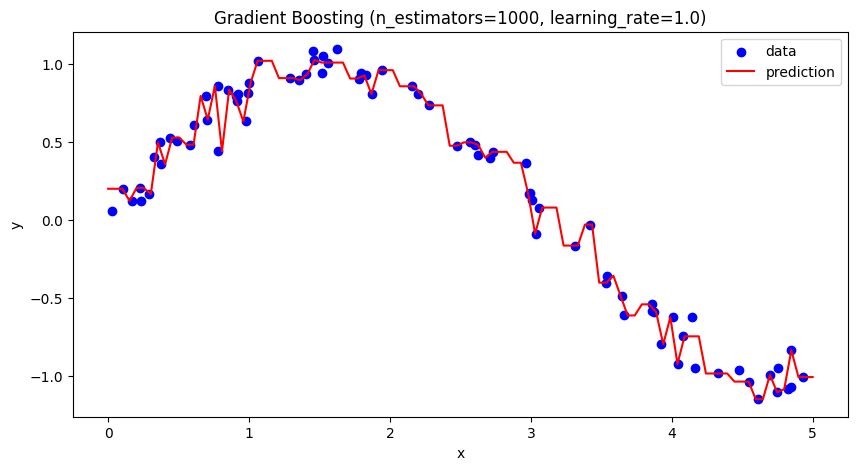

Nhiều mô hình con, learning rate cao: (2.1425970631308e-33, 0.008312803855800889)


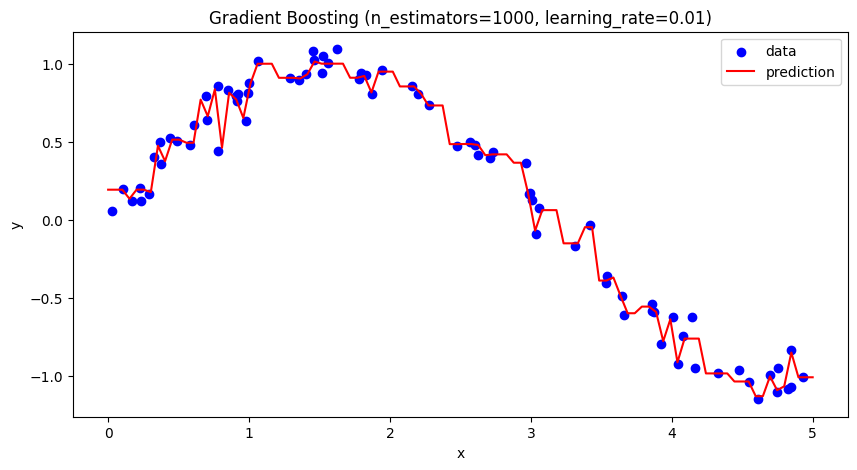

Nhiều mô hình con, learning rate thấp: (0.00016899258553125534, 0.007840984172197685)


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Tạo dữ liệu mẫu
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hàm để vẽ kết quả
def plot_results(model, title):
    X_plot = np.linspace(0, 5, 100)[:, np.newaxis]
    y_pred = model.predict(X_plot)
    
    plt.figure(figsize=(10, 5))
    plt.scatter(X, y, color='b', label='data')
    plt.plot(X_plot, y_pred, color='r', label='prediction')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.show()

# Thử nghiệm với AdaBoost
def test_adaboost(n_estimators, learning_rate):
    model = AdaBoostRegressor(
        DecisionTreeRegressor(max_depth=4),
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    plot_results(model, f'AdaBoost (n_estimators={n_estimators}, learning_rate={learning_rate})')
    return train_mse, test_mse

# Thử nghiệm với Gradient Boosting
def test_gradient_boosting(n_estimators, learning_rate):
    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=4,
        random_state=42
    )
    model.fit(X_train, y_train)
    train_mse = mean_squared_error(y_train, model.predict(X_train))
    test_mse = mean_squared_error(y_test, model.predict(X_test))
    plot_results(model, f'Gradient Boosting (n_estimators={n_estimators}, learning_rate={learning_rate})')
    return train_mse, test_mse

# Thử nghiệm các trường hợp
print("AdaBoost:")
print("Ít mô hình con:", test_adaboost(10, 0.1))
print("Nhiều mô hình con, learning rate cao:", test_adaboost(1000, 1.0))
print("Nhiều mô hình con, learning rate thấp:", test_adaboost(1000, 0.01))

print("\nGradient Boosting:")
print("Ít mô hình con:", test_gradient_boosting(10, 0.1))
print("Nhiều mô hình con, learning rate cao:", test_gradient_boosting(1000, 1.0))
print("Nhiều mô hình con, learning rate thấp:", test_gradient_boosting(1000, 0.01))

              Feature  AdaBoost Importance  Gradient Boosting Importance
1  Experience (Years)             0.500432                      0.525520
2            Position             0.492506                      0.458942
0              Gender             0.007063                      0.015538


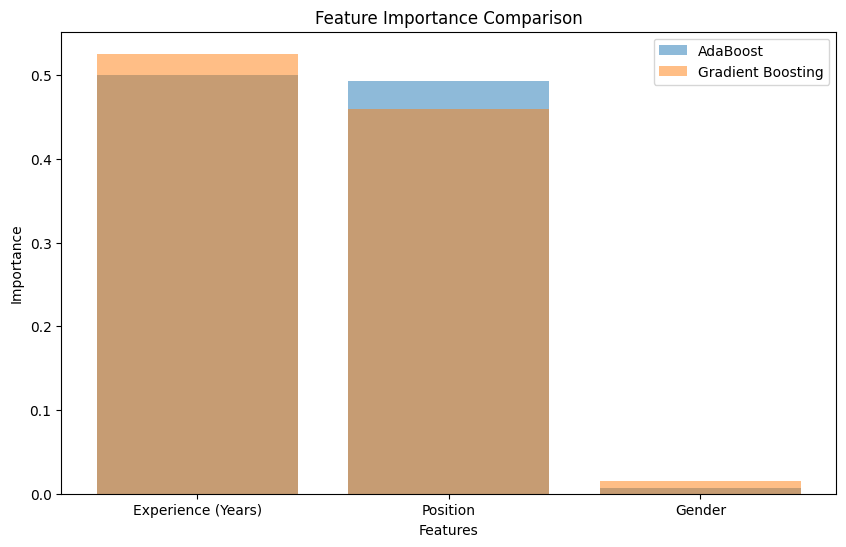

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt

# Đọc dữ liệu
df = pd.read_csv('employee_data.csv')

# Tiền xử lý dữ liệu
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Position'] = le.fit_transform(df['Position'])

# Chuẩn bị dữ liệu
X = df[['Gender', 'Experience (Years)', 'Position']]
y = df['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình AdaBoost
adaboost = AdaBoostRegressor(random_state=42)
adaboost.fit(X_train, y_train)

# Huấn luyện mô hình Gradient Boosting
gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

# Lấy tầm quan trọng của đặc trưng
adaboost_importances = adaboost.feature_importances_
gb_importances = gb.feature_importances_

# Tạo DataFrame để hiển thị kết quả
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'AdaBoost Importance': adaboost_importances,
    'Gradient Boosting Importance': gb_importances
})

# Sắp xếp theo tầm quan trọng giảm dần
feature_importance_df = feature_importance_df.sort_values('Gradient Boosting Importance', ascending=False)

print(feature_importance_df)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['AdaBoost Importance'], alpha=0.5, label='AdaBoost')
plt.bar(feature_importance_df['Feature'], feature_importance_df['Gradient Boosting Importance'], alpha=0.5, label='Gradient Boosting')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance Comparison')
plt.legend()
plt.show()

In [5]:
from sklearn.metrics import mean_squared_error, r2_score

# Tạo và huấn luyện mô hình AdaBoost với các tham số được chỉ định
adaboost = AdaBoostRegressor(n_estimators=50, random_state=42)
adaboost.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra cho AdaBoost
y_pred_adaboost = adaboost.predict(X_test)

# Tính MSE và R^2 cho AdaBoost
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# Tạo và huấn luyện mô hình Gradient Boosting với các tham số được chỉ định
gb = GradientBoostingRegressor(n_estimators=50, random_state=42)
gb.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra cho Gradient Boosting
y_pred_gb = gb.predict(X_test)

# Tính MSE và R^2 cho Gradient Boosting
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# In kết quả
print("AdaBoost:")
print(f"MSE: {mse_adaboost:.2f}")
print(f"R^2: {r2_adaboost:.2f}")

print("\nGradient Boosting:")
print(f"MSE: {mse_gb:.2f}")
print(f"R^2: {r2_gb:.2f}")

# Đánh giá hiệu suất dựa trên R^2
def evaluate_performance(r2):
    if 0.7 <= r2 <= 0.8:
        return "A"
    elif 0.6 <= r2 < 0.7:
        return "B"
    elif 0.4 <= r2 < 0.5:
        return "C"
    elif 0.1 <= r2 < 0.2:
        return "D"
    else:
        return "Không thuộc các khoảng đã cho"

print("\nĐánh giá hiệu suất:")
print(f"AdaBoost: {evaluate_performance(r2_adaboost)}")
print(f"Gradient Boosting: {evaluate_performance(r2_gb)}")

AdaBoost:
MSE: 706602034.71
R^2: 0.62

Gradient Boosting:
MSE: 669389596.76
R^2: 0.64

Đánh giá hiệu suất:
AdaBoost: B
Gradient Boosting: B


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# 1. Đọc dữ liệu
data = pd.read_csv('employee_data.csv')
print(data.head())

# 2. Label Encoding
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Position'] = le.fit_transform(data['Position'])

# 3. Tách dữ liệu thành bộ feature (X) và label (y)
X = data[['Gender', 'Experience (Years)', 'Position']]
y = data['Salary']

# 4. Tách tập dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình XGBoost
params = {
    'n_estimators': 50,
    'random_state': 42
}

xgb_model = XGBRegressor(**params)

# Câu trả lời cho câu hỏi Multiple-choice
print("Câu trả lời đúng: D")
print("Giải thích: Mô hình XGBoost được khởi tạo là một mô hình hồi quy (XGBRegressor), có 50 cây (n_estimators=50), và random_state=42 được sử dụng để đảm bảo kết quả có thể tái hiện lại.")


   ID Gender  Experience (Years)               Position  Salary
0   1      F                   4        DevOps Engineer  109976
1   2      M                   6        DevOps Engineer  120088
2   3      M                  17          Web Developer  181301
3   4      M                   7  Systems Administrator   77530
4   5      F                  13  Systems Administrator  152397
Câu trả lời đúng: D
Giải thích: Mô hình XGBoost được khởi tạo là một mô hình hồi quy (XGBRegressor), có 50 cây (n_estimators=50), và random_state=42 được sử dụng để đảm bảo kết quả có thể tái hiện lại.


In [8]:
# Huấn luyện mô hình
xgb_model.fit(X_train, y_train)

# Sử dụng hàm get_score() để lấy điểm quan trọng của các đặc trưng
feature_importance = xgb_model.get_booster().get_score(importance_type='weight')

# Sắp xếp các đặc trưng theo thứ tự giảm dần của điểm quan trọng
sorted_features = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)

print("Thứ tự quan trọng của các đặc trưng:")
for feature, score in sorted_features:
    print(f"{feature}: {score}")

# Xác định đặc trưng được sử dụng nhiều nhất để phân nhánh
most_important_feature = sorted_features[0][0]

print(f"\nĐặc trưng được sử dụng nhiều nhất để phân nhánh: {most_important_feature}")

print("\nCâu trả lời đúng: B) Experience")
print("Giải thích: Dựa vào kết quả từ hàm get_score(), ta thấy 'Experience (Years)' có điểm quan trọng cao nhất, cho thấy đây là đặc trưng được sử dụng nhiều nhất để phân nhánh trong mô hình XGBoost.")


Thứ tự quan trọng của các đặc trưng:
Experience (Years): 1041.0
Position: 765.0
Gender: 302.0

Đặc trưng được sử dụng nhiều nhất để phân nhánh: Experience (Years)

Câu trả lời đúng: B) Experience
Giải thích: Dựa vào kết quả từ hàm get_score(), ta thấy 'Experience (Years)' có điểm quan trọng cao nhất, cho thấy đây là đặc trưng được sử dụng nhiều nhất để phân nhánh trong mô hình XGBoost.
